# Himmelblau's - Unconstrained Optimization

### Written by José Hugo Elsas, Tecgraf (PUC-Rio), BR.

*Last updated Monday, 6 May 2019.*

This is a GPyOpt unscontrained optimization example for the [Himmelblau's function](https://en.wikipedia.org/wiki/Test_functions_for_optimization). The four minimium are the points:

$f(3.0,2.0) = f(-2.805118,3.131312) = f(-3.779310,-3.283186) = f(3.584428,-1.848126) = 0.0$

The important imports are the [GPy](https://sheffieldml.github.io/GPy/) and [GPyOpt](https://github.com/SheffieldML/GPyOpt) libraries, and the initial_design function to select the first points to initialize the method.

In [1]:
import GPy
import GPyOpt
import numpy as np
from matplotlib import cm
from numpy.random import seed
import matplotlib.pyplot as plt
from GPyOpt.experiment_design import initial_design

The definition of the Himmelblau function is given by the function below:

In [2]:
def Himmelblau(x1,x2):
    f1 = (x1**2 + x2 - 11)**2
    f2 = (x1 + x2**2 - 7 )**2
    return np.array(f1+f2)

We use the linspace and meshgrid on (x0,y0) into (xv,yv) variables to be able to plot and visualize the function in 2D and 3D

In [3]:
v_Himmelblau = np.vectorize(Himmelblau)

func = v_Himmelblau
f    = func

x0 = np.linspace(-5,5,101)
y0 = np.linspace(-5,5,101)

xv,yv = np.meshgrid(x0,y0)
zv = v_Himmelblau(xv,yv)

To the left, the 2D heatmap plot of the Himmelblau function, and to the right, a 3D rendering of the same function. There are four local minima, that are also global, which correspond to the four dips observed in the below pictures.

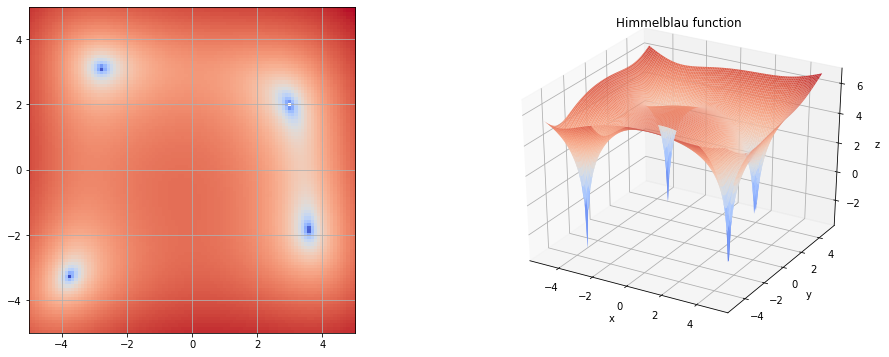

In [4]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(1,2,1)
ax.grid()
ax.imshow(np.log(zv),cmap=cm.coolwarm,extent=(-5,5,-5,5),origin='bottom')

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.plot_surface(xv, yv, np.log(zv), rstride=1, cstride=1,
                cmap=cm.coolwarm, edgecolor='none',
                vmin = -3, vmax = 7)

ax2.set_title('Himmelblau function');
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.show()

For the use of GPyOpt library, one need to define the domain in to dimensions, corresponding to $[-5,5] \times [-5,5]$, which initializes the GPyOpt Design_space variable. The initial choice of points is done via the initial_design function, according to a random sampling. Then the function, in this case the Goldstein-Price function, is evaluated in those points.

In [5]:
domain = [{'name': 'var1', 'type': 'continuous', 'domain': (-5,5)},
          {'name': 'var2', 'type': 'continuous', 'domain': (-5,5)}]

space    = GPyOpt.Design_space(domain)

num_init = 20
X_init = initial_design('random',space,num_init)
Y_init = f(X_init[:,0],X_init[:,1])
Y_init = Y_init[:,np.newaxis]

The main external loop is executed using the BayesianOptimization object, initialized with the interpolation method of usual Gaussian Process, the acquisition function is the Expected Improvement, and jitter = $10^{-10}$ for a standard Bayesian Optimization loop.

In [6]:
count = 0

max_iter = 100 - num_init
X_step = X_init
Y_step = Y_init

while count < max_iter:
    print("count = ",count)
    
    bo_step = GPyOpt.methods.BayesianOptimization(f = None, domain = domain, X = X_step, Y = Y_step, 
                                                  model_type='GP', acquisition_type='EI',jitter=1e-10)
    
    x_next = bo_step.suggest_next_locations()
    y_next = f(x_next[:,0],x_next[:,1]) # here comes function evaluation
    
    X_step = np.vstack((X_step,x_next))
    Y_step = np.vstack((Y_step,y_next))
    
    count += 1

count =  0
count =  1
count =  2
count =  3
count =  4
count =  5
count =  6
count =  7
count =  8
count =  9
count =  10
count =  11
count =  12
count =  13
count =  14
count =  15
count =  16
count =  17
count =  18
count =  19
count =  20
count =  21
count =  22
count =  23
count =  24
count =  25
count =  26
count =  27
count =  28
count =  29
count =  30
count =  31
count =  32
count =  33
count =  34
count =  35
count =  36
count =  37
count =  38
count =  39
count =  40
count =  41
count =  42
count =  43
count =  44
count =  45
count =  46
count =  47
count =  48
count =  49
count =  50
count =  51
count =  52
count =  53
count =  54
count =  55
count =  56
count =  57
count =  58
count =  59
count =  60
count =  61
count =  62
count =  63
count =  64
count =  65
count =  66
count =  67
count =  68
count =  69
count =  70
count =  71
count =  72
count =  73
count =  74
count =  75
count =  76
count =  77
count =  78
count =  79


Plotting the heatmap of the Himmelblau function against the scatterplot of the queried points, one obtains the pciture below:

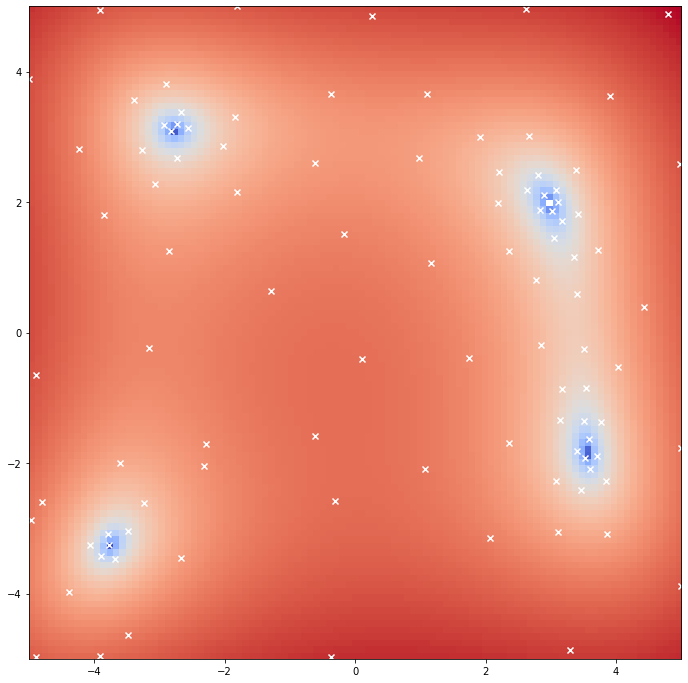

In [8]:
fig = plt.figure(figsize = (12,12))

plt.imshow(np.log(zv),cmap=cm.coolwarm,extent=(-5,5,-5,5),origin='bottom')
plt.scatter(X_step[:,0],X_step[:,1],marker='x',color='white')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

The summary of the results of the optimizaton:

In [12]:
print("Point step where minimium was found: ",np.argmin(Y_step))
print("Exact Global minima: ")
print(np.array([[-2.805118,3.131312,Himmelblau(-2.805118, 3.131312)],[3.000000, 2.000000,Himmelblau( 3.000000, 2.000000)],[-3.779310,-3.283186,Himmelblau(-3.779310,-3.283186)],[3.584428,-1.848126,Himmelblau( 3.584428,-1.848126)]]))
print("Global minima found: ")
print(np.hstack((X_step[Y_step[:,0]<0.5,:],Y_step[Y_step<0.5][:,np.newaxis])))

Point step where minimium was found:  32
Exact Global minima: 
[[-2.80511800e+00  3.13131200e+00  1.09892967e-11]
 [ 3.00000000e+00  2.00000000e+00  0.00000000e+00]
 [-3.77931000e+00 -3.28318600e+00  3.79786108e-12]
 [ 3.58442800e+00 -1.84812600e+00  8.89437650e-12]]
Global minima found: 
[[ 2.89615249  2.11389795  0.38142389]
 [-3.76652163 -3.25627891  0.0314675 ]
 [ 3.01483482  1.86091219  0.27514845]
 [ 3.52516573 -1.92320618  0.29655136]
 [-2.82078308  3.08376419  0.09848078]
 [-2.72964623  3.20428955  0.40810305]
 [ 3.11421318  1.99756893  0.49518577]]
